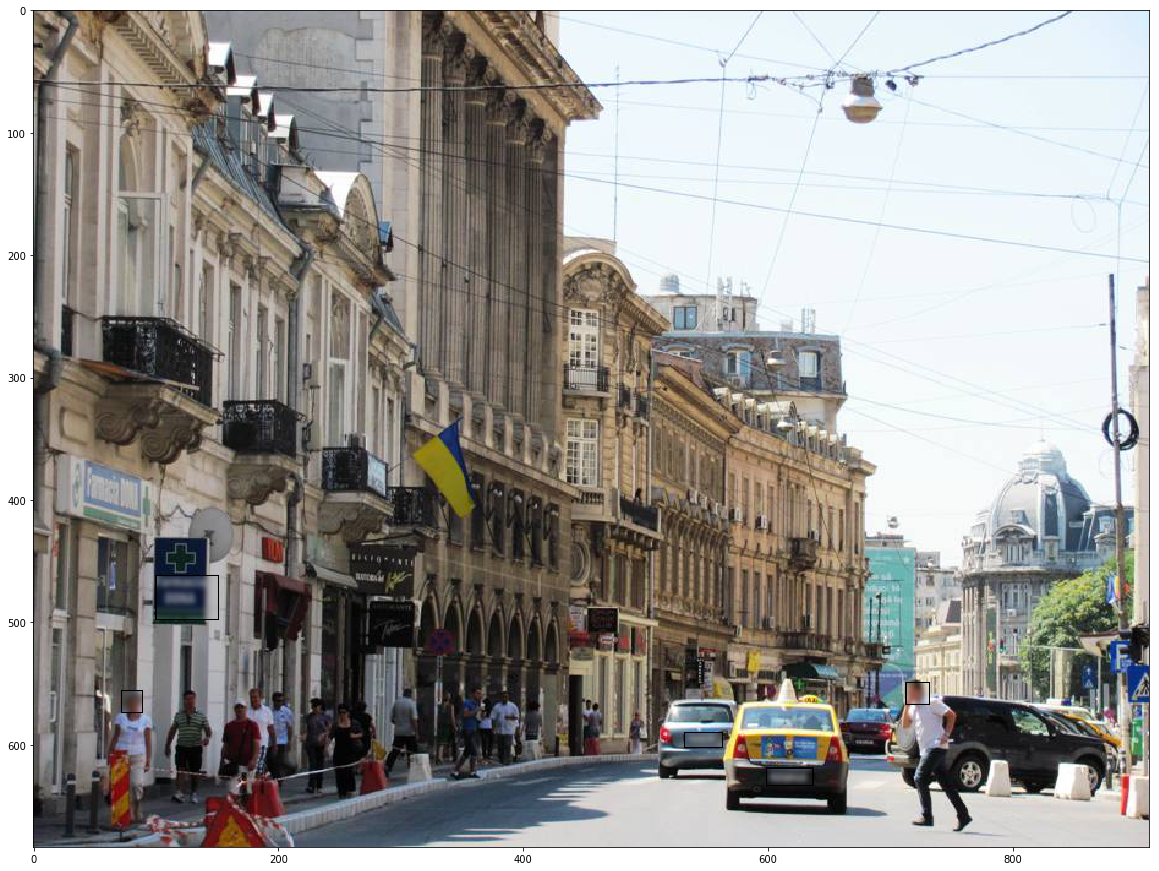

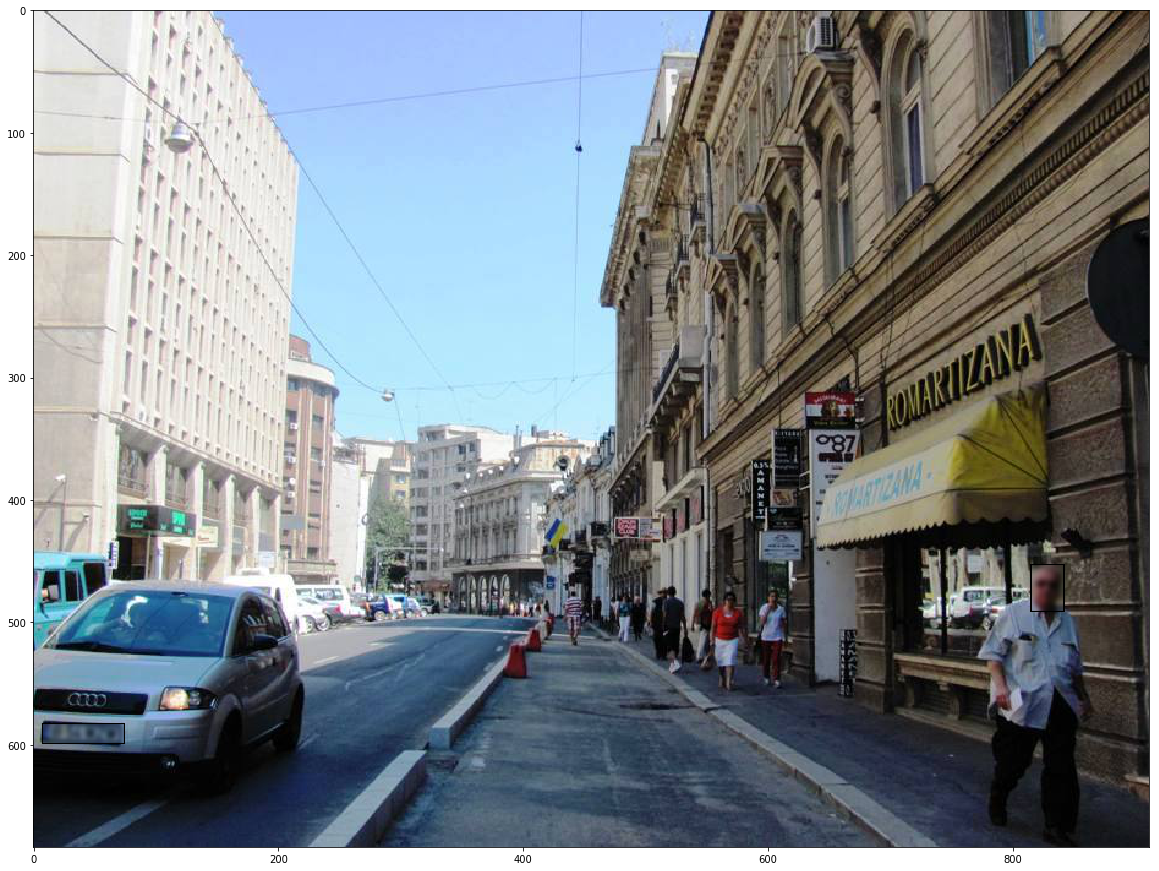

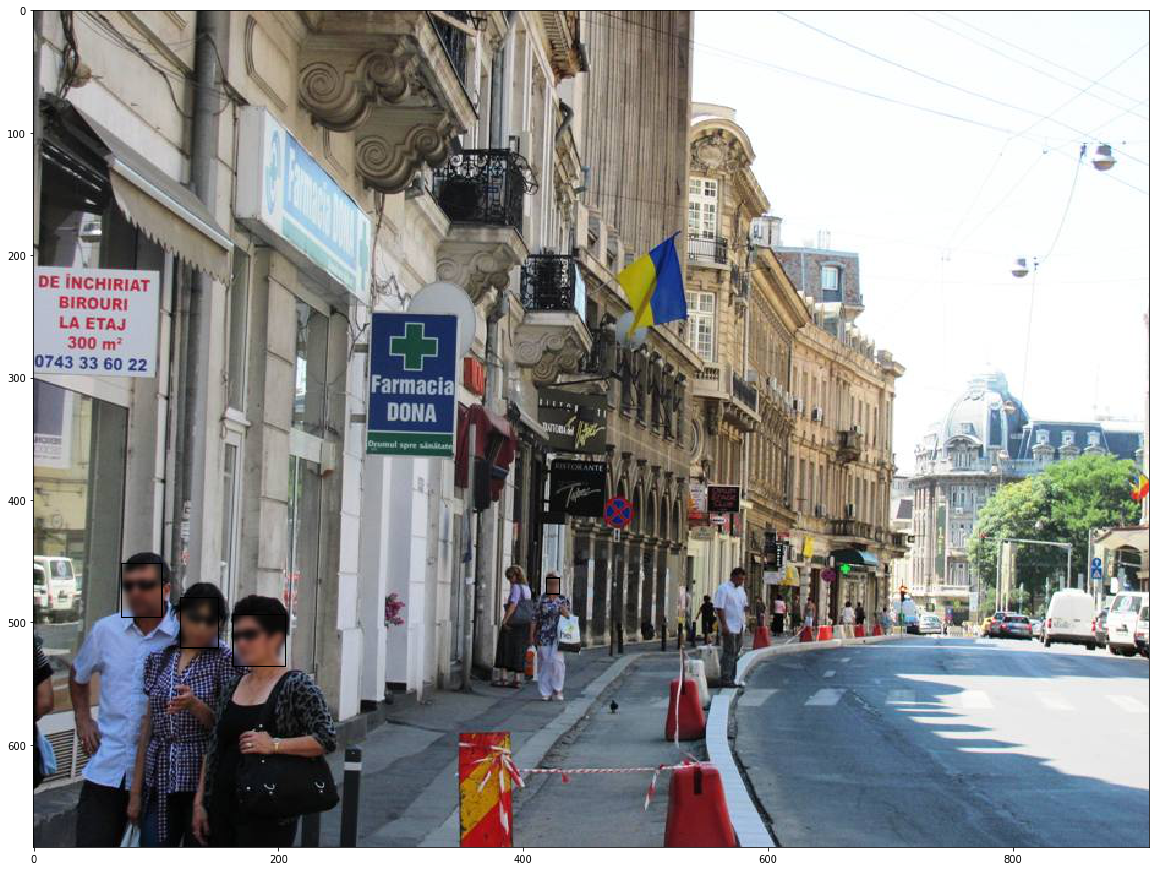

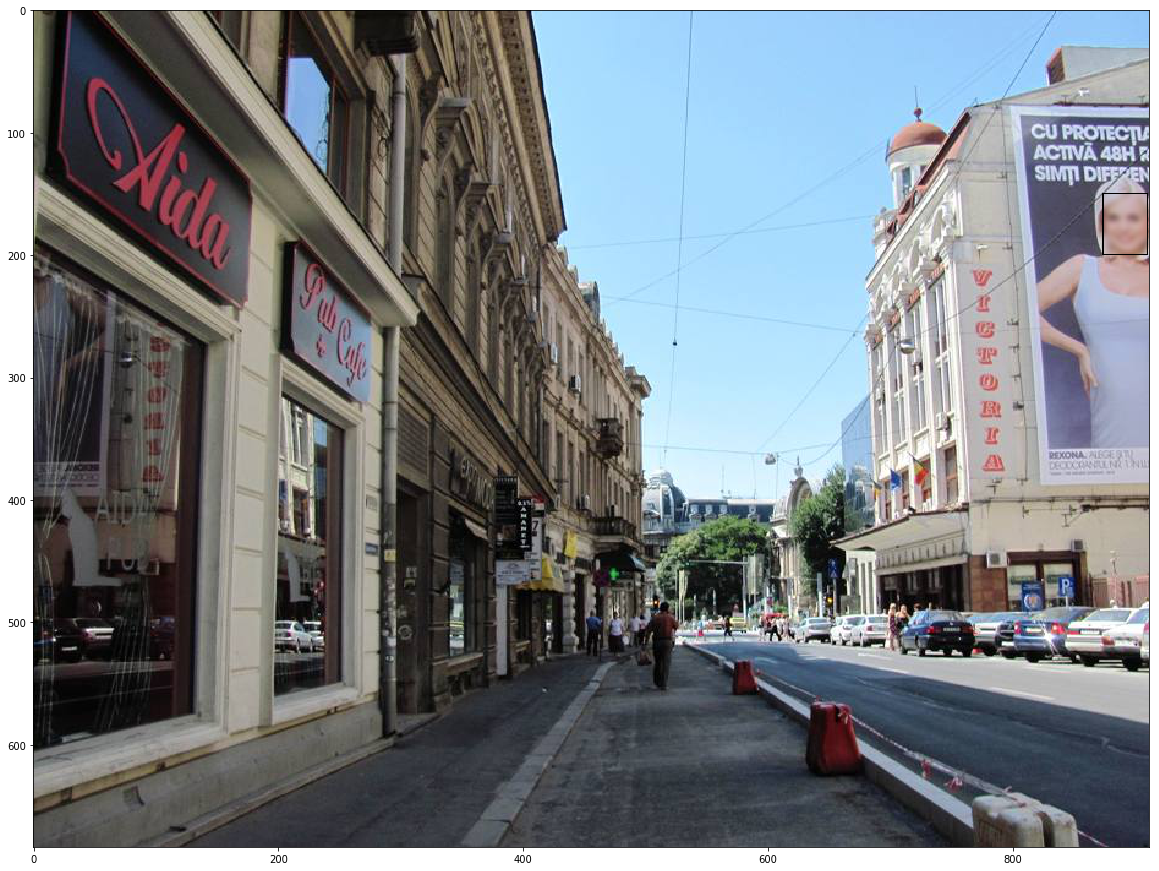

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.io as spio
import scipy.ndimage as spimage
from IPython.display import Image
from IPython.display import display

def blur_identity (img, detections) :
    detections = np.array(detections)

    for detection in detections :
        topc = (detection[2], detection[0])
        botc = (detection[3], detection[1]) 
        
        hslice = slice(topc[0], botc[0])
        vslice = slice(topc[1], botc[1])
        
        clip = img[vslice, hslice]

        spimage.gaussian_filter(clip, (2, 2, 0), output=clip)
        
        clip[0,:,:] = 0
        clip[-1,:,:] = 0
        clip[:,0,:] = 0
        clip[:,-1,:] = 0

        
images = ['img1', 'img2', 'img3', 'img4']

for imname in images :
    im = spimage.imread(imname + '.jpg')
    detections = spio.loadmat(imname + '_detectii.mat')['D']
    
    blur_identity(im, detections)
    
    plt.figure(figsize=(20,20))
    plt.imshow(im)
    plt.show()
